<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/Final_Final_Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import copy

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/colab/images


In [0]:

def draw_proba(img,centroid,porcentaje):
  overlay = img.copy()

  
  font = cv2.FONT_HERSHEY_SIMPLEX
  font_size = 0.3
  font_color = (255, 255, 255)
  #print(centroid)
  left, top, right, bottom = centroid[0] - 20, centroid[1]-20, centroid[0]+20, centroid[1]+20
  cv2.rectangle(img,(left,top),(right,bottom),(0,0,255,0.4),-1,1)
  cv2.putText(img,str(porcentaje),(left+5,top+24),font,font_size,font_color,1,cv2.LINE_AA)
    
  # (3) blend with the original:
  opacity = 0.3
  cv2.addWeighted(overlay, opacity, img, 1 - opacity, 0, img)

  return img


def get_centroids(img,contours):
  centroids = []
  if len(contours)>0:
    for indx, c in enumerate(contours):
       
      M = cv2.moments(c)
      #print(c[0])
      #print M,"id2 ",idx2,"id1 ",idx1
      if M["m00"]!=0:
        cX= int(M["m10"] / M["m00"])
        cY= int(M["m01"] / M["m00"])
        centroids.append((cX,cY))
        cv2.circle(img, (cX, cY), 4, [0], -1)
      else:
        print ("the interception area is too small")
  else:
    area = 0
    print('area = 0')
    
  return img,centroids


def display4(a, b,c,d,title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited"):
    plt.figure(figsize=(12,4))
    plt.subplot(141), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()

def display(a,title1 = "Original"):
    plt.figure(figsize=(10,10))
    plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    
def display8(a, b,c,d,e,f,g,h,title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited",title5 = "Original", title6 = "Edited", title7 = "Edited", title8 = "Edited"):
    plt.figure(figsize=(12,4))
    plt.subplot(241), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(242), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(243), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(244), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.subplot(245), plt.imshow(e,cmap='gray'), plt.title(title5)
    plt.xticks([]), plt.yticks([])
    plt.subplot(246), plt.imshow(f,cmap='gray'), plt.title(title6)
    plt.xticks([]), plt.yticks([])
    plt.subplot(247), plt.imshow(g,cmap='gray'), plt.title(title7)
    plt.xticks([]), plt.yticks([])
    plt.subplot(248), plt.imshow(h,cmap='gray'), plt.title(title8)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
def Threshold(img,thres):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype = np.uint8)
     
    #intervalos
    T = thres
 
    for x in range(0,rows):
        for y in range(0,columns):
            r = img[x][y]
            if T<=r:
                img2[x][y] = 255
            else:
                img2[x][y] = 0
    return img2

def ThresholdNeg(img,thres):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype = np.uint8)
     
    #intervalos
    T = thres
 
    for x in range(0,rows):
        for y in range(0,columns):
            r = img[x][y]
            if T<=r:
                img2[x][y] = 0
            else:
                img2[x][y] = 255
    return img2
  
def negative(img):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros((rows, columns), dtype = np.uint8)
    for x in range(rows):
        for y in range(columns):
            img2[x, y] = (256-1)-img[x,y]
    return img2
  
def fraccionamiento(img,minr=10,maxr=60):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype = np.uint8)
     
    #intervalos
    a = minr
    b = maxr
 
    for x in range(0,rows):
        for y in range(0,columns):
            r = img[x][y]
            if a <=r and r<=b:
                img2[x][y] = 255
            else:
                img2[x][y] = img[x][y]
    
    return img2

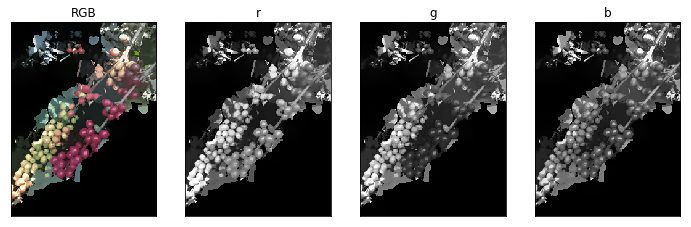

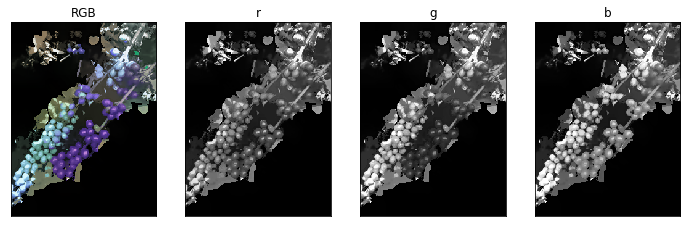

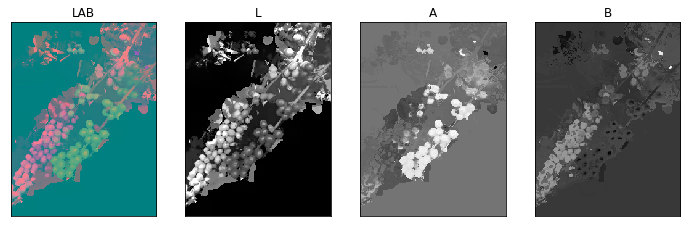

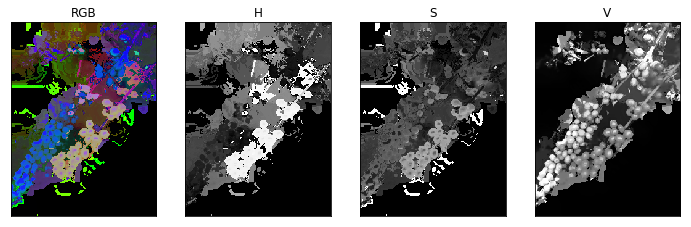

In [0]:
name = 'se_cafe3.jpg'
img_BGR=cv2.imread(name,cv2.IMREAD_COLOR)
img_RGB_total=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)

name = 'se_cafe3.jpg'
img_BGR=cv2.imread(name,cv2.IMREAD_COLOR)
img_RGB_Final=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)

shifted = cv2.pyrMeanShiftFiltering(img_BGR, 21, 51) # 21, 51
img_RGB=cv2.cvtColor(shifted,cv2.COLOR_BGR2RGB)
img_RGBCopy = copy.copy(img_RGB)
img_RGBCopyII = copy.copy(img_RGB)
img_RGBCopyIII = copy.copy(img_RGB)


r,g,b = cv2.split(img_RGB)

sr,sg,sb = cv2.split(shifted)


img_LAB=cv2.cvtColor(shifted, cv2.COLOR_BGR2LAB);
L,A,B = cv2.split(img_LAB)

img_HSV=cv2.cvtColor(shifted, cv2.COLOR_BGR2HSV);
H,S,V = cv2.split(img_HSV)

display4(img_RGB,r,g,b,"RGB","r","g","b")
display4(shifted,sr,sg,sb,"RGB","r","g","b")
display4(img_LAB,L,A,B,"LAB","L","A","B")
display4(img_HSV,H,S,V,"RGB","H","S","V")

## Yellow and Green

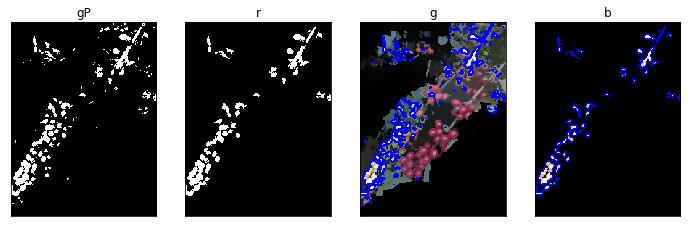

In [0]:
gP = np.array(255*(g/255)**2.2,dtype='uint8')
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
gP=Threshold(gP,100)
gP_ = copy.copy(gP)

_, contours, _= cv2.findContours(image = gP, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
img_con = cv2.drawContours(image = img_RGBCopy, contours = contours, contourIdx = -1, color = (0, 0, 255), thickness = 2)

#areas=[]
contours2Filter=[]
contourok=[]

for idx,c in enumerate(contours):
    area=cv2.contourArea(c)
    #print(area)
    #areas.append(cv2.contourArea(c))
    #print(area)
    if area <= 30:
      contours2Filter.append(c)
    else:
      contourok.append(c)

#Final = cv2.drawContours(image = img_BGR, contours = contours2Filter, contourIdx = -1, color = (0, 0, 255), thickness = -1)
M_R=cv2.drawContours(image = gP, contours = contours2Filter, contourIdx = -1, color = (0, 0, 0), thickness = -1)

#NewIm = M_R*img_RGB
#H2=negative(M_R)
new_im=cv2.bitwise_and(img_RGBCopy,img_RGBCopy,mask=M_R)
display4(gP_,M_R,img_con,new_im,"gP","r","g","b")




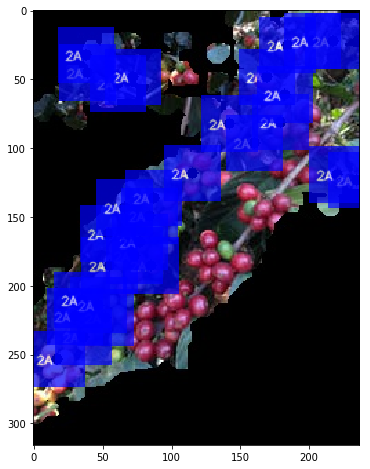

In [0]:
#prue

img,centroids =  get_centroids(img_RGB_total,contourok)
#img_con = cv2.drawContours(image = img_BGR, contours = contours2Filter, contourIdx = -1, color = (0, 0, 255), thickness = 5)

for indx,c in enumerate (centroids):
  imgx = draw_proba(img,c,"2A")
  
plt.figure(figsize=(8,8)) 
plt.imshow(imgx,cmap="gray")
plt.show()

## Red

14
5


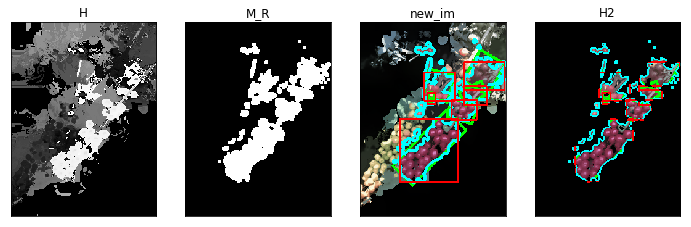

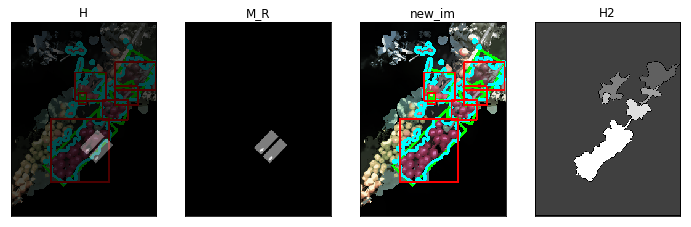

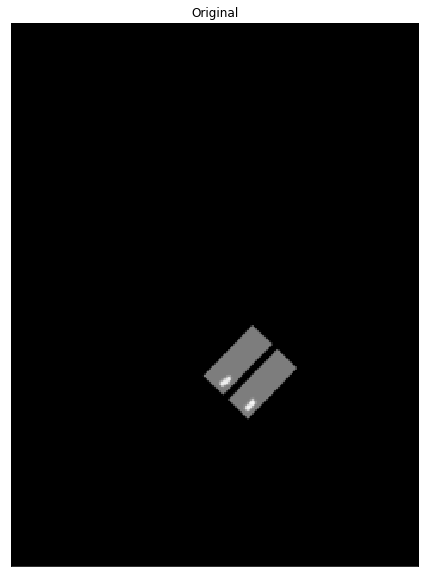

In [0]:
img_HSV=cv2.cvtColor(img_RGBCopyII, cv2.COLOR_BGR2HSV);
H2 = np.array(255*(H/255)**2.2,dtype='uint8')

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

H3=Threshold(H2,100)
#H4= erosion = cv2.erode(H3,kernel,iterations = 10)
H3 = cv2.dilate(H3, kernel, iterations=1)

#H2=negative(M_R)
#new_im=cv2.bitwise_and(img_RGB,img_RGB,mask=H2)

#display4(H,H2,H3,M_R,"H","M_R","new_im","H2")



_, contours, _= cv2.findContours(image = H3, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
img_con = cv2.drawContours(image = img_RGBCopyII, contours = contours, contourIdx = -1, color = (0, 255, 255), thickness = 4)
print(len(contours))
#areas=[]
contours2Filtera=[]
contourokre=[]


for idx,c in enumerate(contours):
    area=cv2.contourArea(c)
    #print(area)
    #areas.append(cv2.contourArea(c))
    #print(area)
    if area <= 50:
      contours2Filtera.append(c)
    else:
      contourokre.append(c)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(H3,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
# ret 
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img_RGBCopyIII,markers)

rows, columns,ch = img_RGBCopyIII.shape
img_M = np.zeros( (rows, columns), dtype = np.uint8)

contours_M=[]

for i in range(2,ret+1):
    img_M = np.zeros( (rows, columns), dtype = np.uint8)
    img_M[markers == i]=[255]
    #img_RGBCopyIII[markers == i] = [255,255,255]
    _, cntr, _= cv2.findContours(image =img_M, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
    #print("yy",len(cntr))
    #c = max(cntr, key=cv2.contourArea)
    #print("xxxx",i)
    contours_M.append(cntr[0])
    
    #------ para contruir ractangulo a la medida--------------
    '''
    rect (x, y), (w, h), angle
    rect=cv2.minAreaRect(cntr[0])
    box = cv2.boxPoints(rect)
    box_d = np.int0(box)
    cv2.drawContours(img_RGBCopyII, [box_d], 0, (0,255,0), 3)
    left,top,right,bottom, angle= int(rect[0][0]),int(rect[0][1]),int(rect[0][0])+40,int(rect[0][1])+15,int(rect[2])
    textImg=np.zeros( (rows, columns,3), dtype = np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_size = 0.1
    font_color = (255, 255, 255)
    cv2.rectangle(textImg,(left,top),(right,bottom),(125,125,125,0.8),-1,1)
    cv2.rectangle(textImg,(left,top+20),(right,bottom+20),(125,125,125,0.6),-1,1)
    cv2.putText(textImg,"Ripe",(left+3,top+12),font,font_size,font_color,1,cv2.LINE_AA)
    cv2.putText(textImg,str(80)+"%",(left+3,top+32),font,font_size,font_color,1,cv2.LINE_AA)
    '''
    #-----------------------------------------------------------
    
    (x,y,w,h) = cv2.boundingRect(cntr[0])
    cv2.rectangle(img_RGBCopyII, (x,y), (x+w,y+h), (255, 0, 0), 2)
    left,top,right,bottom= x,y,x+40,y+15
    textImg=np.zeros( (rows, columns,3), dtype = np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_size = 0.1
    font_color = (255, 255, 255)
    cv2.rectangle(textImg,(left,top),(right,bottom),(125,125,125,0.8),-1,1)
    cv2.rectangle(textImg,(left,top+20),(right,bottom+20),(125,125,125,0.6),-1,1)
    cv2.putText(textImg,"Ripe",(left+3,top+12),font,font_size,font_color,1,cv2.LINE_AA)
    cv2.putText(textImg,str(80)+"%",(left+3,top+32),font,font_size,font_color,1,cv2.LINE_AA)
    
    #center=tuple(np.array([rows,columns])/2)
    center=tuple(np.array([left,top]))
    rot_mat = cv2.getRotationMatrix2D(center,-angle,1.0)
    textImg = cv2.warpAffine(textImg, rot_mat, (columns,rows))
    #alpha=0.7
    #beta = (1.0 - alpha)
    #img_RGB_Final = cv2.addWeighted(textImg, alpha, img_RGB_Final, beta, 0.0)
     
#m=cv2.drawContours(image = img_RGBCopyIII, contours = contours_M, contourIdx = -1, color = (255, 255, 255), thickness = 5)
alpha=0.7
beta = (1.0 - alpha)
dst = cv2.addWeighted(textImg, alpha, img_RGBCopyII, beta, 0.0)

#img_RGB_Final=img_RGB_Final+textImg

print(len(contours2Filtera))      
M_R=cv2.drawContours(image = H3, contours = contours2Filtera, contourIdx = -1, color = (255, 255, 255), thickness = -1)


new_im=cv2.bitwise_and(img_RGBCopyII, img_RGBCopyII,mask=M_R)
display4(H,H3,img_con,new_im,"H","M_R","new_im","H2")
display4(dst,textImg,img_RGBCopyII,markers,"H","M_R","new_im","H2")
display(textImg)


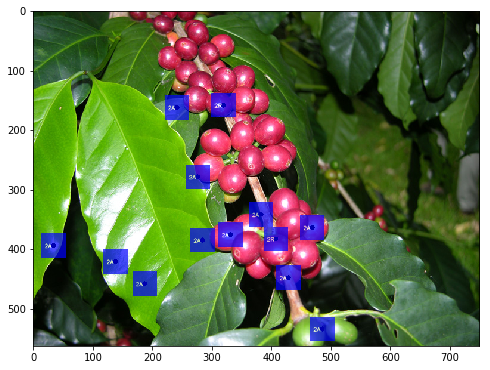

In [0]:

#prue

img,centroids =  get_centroids(img_RGB_total,contourokre)
#img_con = cv2.drawContours(image = img_BGR, contours = contours2Filter, contourIdx = -1, color = (0, 0, 255), thickness = 5)

for indx,c in enumerate (centroids):
  imgx = draw_proba(img,c,"2R")
  
plt.figure(figsize=(8,8)) 
plt.imshow(imgx,cmap="gray")
plt.show()


In [0]:
#img_con = cv2.drawContours(image = img_RGBCopyIII, contours = contourok, contourIdx = -1, color = (1250, 0, 125), thickness = 1)
#img_con = cv2.drawContours(image = img_con, contours = contourokre, contourIdx = -1, color = (0, 255, 255), thickness = 1)

#plt.figure(figsize=(8,8)) 
#plt.imshow(img_con,cmap="gray")
#plt.show()

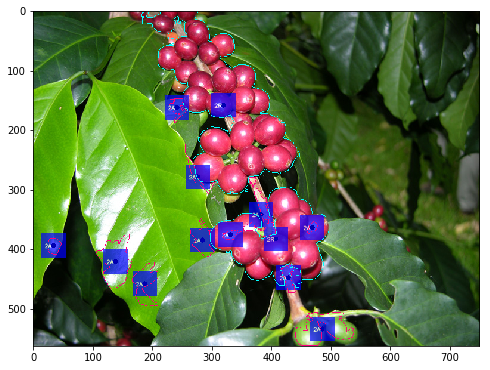

In [0]:
img_con = cv2.drawContours(image = img_RGB_total, contours = contourok, contourIdx = -1, color = (1250, 0, 125), thickness = 1)
img_con = cv2.drawContours(image = img_con, contours = contourokre, contourIdx = -1, color = (0, 255, 255), thickness = 1)

plt.figure(figsize=(8,8)) 
plt.imshow(img_con,cmap="gray")
plt.show()